In [1]:
import pickle
import pandas as pd
import seaborn as sns

In [2]:
with open('cars.pickle', 'rb') as handle:
    cars = pickle.load(handle)

len(cars)

1609

In [3]:
df = pd.DataFrame.from_dict(cars, orient='index')
df.head()

,id,name,year,mileage,price,advert_subtitle,body_type,engine_size,gearbox,fuel_type,doors,0-6Xmph,top_speed,cylinders,power
202109207563077,202109207563077,Porsche 911,2021,1821,116900,2dr PDK 3.0,Convertible,3.0,Automatic,Petrol,2,4.4,179.0,6,380
202109227674550,202109227674550,Porsche 911,1999,101000,15995,3.4 996 Carrera 4 Tiptronic S AWD 2dr,Coupe,3.4,Automatic,Petrol,2,5.2,175.0,6,300
202108136210396,202108136210396,Porsche 911,2000,104825,15995,CARRERA 4 TIP S 3.4 2dr,Coupe,3.4,Automatic,Petrol,2,5.2,175.0,6,300
202106043455421,202106043455421,Porsche 911,2000,90650,15995,3.4 996 Carrera 2 Cabriolet Tiptronic S 2dr,Convertible,3.4,Automatic,Petrol,2,5.2,175.0,6,300
202105082360787,202105082360787,Porsche 911,2001,63800,15995,3.4 996 Carrera 2 Cabriolet Tiptronic S 2dr,Convertible,3.4,Automatic,Petrol,2,5.2,175.0,6,300


In [4]:
df.shape

(1609, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1609 entries, 202109207563077 to 202109177484232
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1609 non-null   object 
 1   name             1609 non-null   object 
 2   year             1609 non-null   object 
 3   mileage          1609 non-null   int64  
 4   price            1609 non-null   int64  
 5   advert_subtitle  1609 non-null   object 
 6   body_type        1609 non-null   object 
 7   engine_size      1609 non-null   float64
 8   gearbox          1609 non-null   object 
 9   fuel_type        1609 non-null   object 
 10  doors            1609 non-null   int64  
 11  0-6Xmph          1560 non-null   float64
 12  top_speed        1560 non-null   float64
 13  cylinders        1609 non-null   int64  
 14  power            1609 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 201.1+ KB


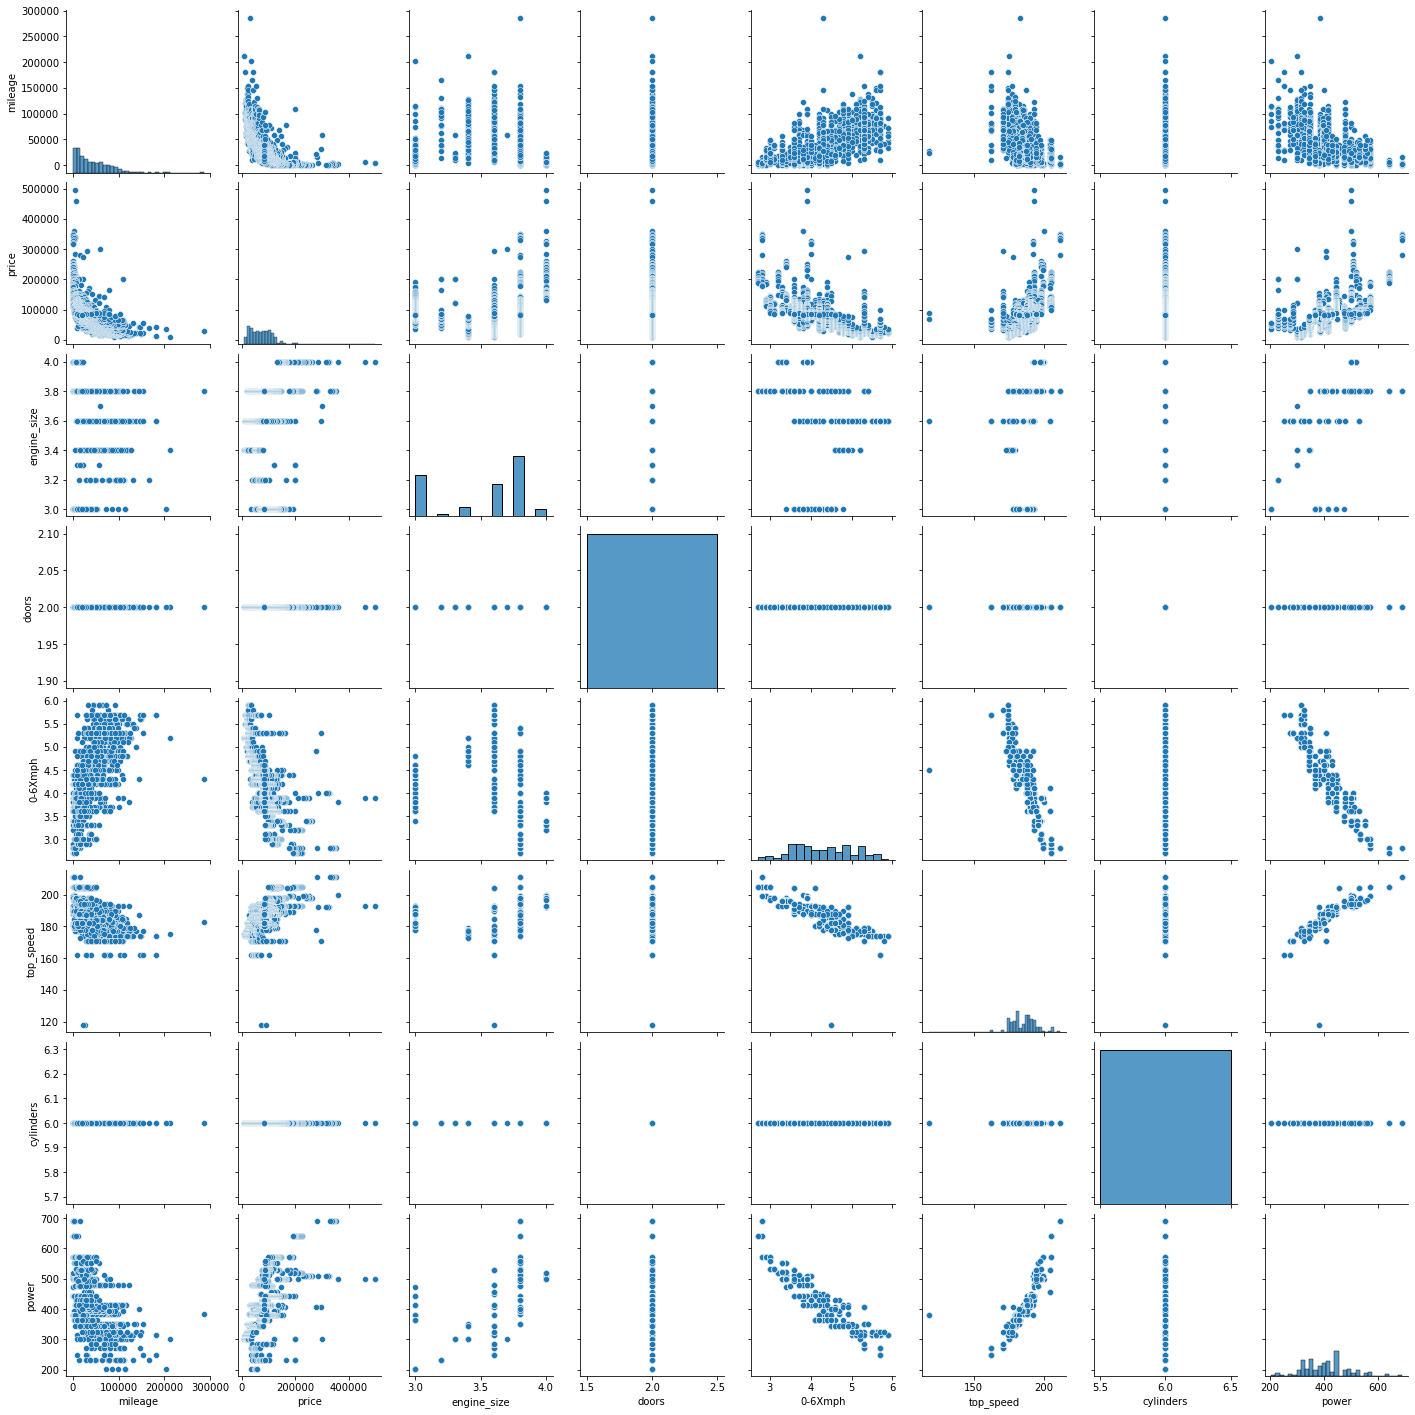

In [6]:
sns.pairplot(df)

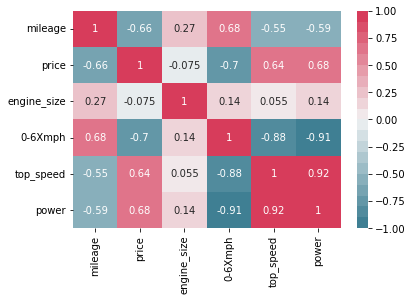

In [7]:
sns.heatmap(df.drop(columns=["doors", "cylinders"]).corr(), cmap=sns.diverging_palette(220, 5, n=20), annot=True, vmin=-1, vmax=1);

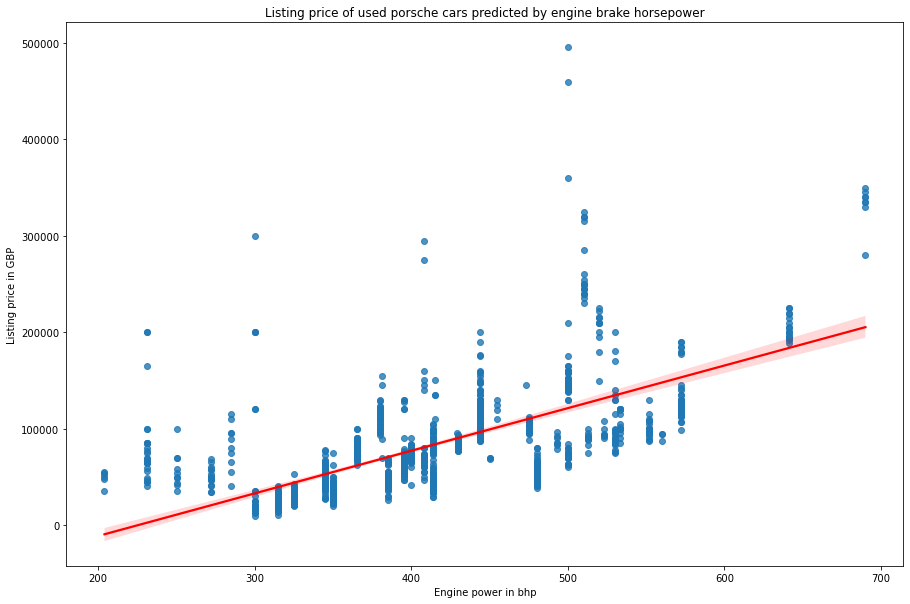

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
ax = sns.regplot(x="power", y="price", data=df, truncate = True, line_kws = {'color': 'red'})

ax.set_xlabel('Engine power in bhp')
ax.set_ylabel('Listing price in GBP')
ax.set_title('Listing price of used porsche cars predicted by engine brake horsepower')

plt.savefig('porsches_price_from_power.png', dpi=300)